<div class="alert alert-block alert-info">

[1. Import](#1st-bullet)<br>
- [1.1 Import libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
 
[2. Data Exploration](#4th-bullet)<br>
- [2.1 Coeherence Check](#5th-bullet)<br>
- [2.2 Outliers](#6th-bullet)<br>   
    - [2.2.1 Manual Filter](#7th-bullet)<br>
    - [2.2.2 IQR method](#8th-bullet)<br>
- [2.3 Missing Values](#9th-bullet)<br>
    - [2.3.1 KNN](#10th-bullet)<br>
    - [2.3.2 Median, Mode](#10th-bullet)<br>
- [2.4 Feature Engineering](#11th-bullet)<br>
- [2.5 Feature Selection](#12th-bullet)<br>
    - [2.5.1 Filter Methods](#13th-bullet)<br>
    - [2.5.2 Wrapper Methods](#14th-bullet)<br>
    - [2.5.3 Embedded Methods](#15th-bullet)<br>
    
  
    


</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Import
       
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import libraries
    
</a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Seeting seaborn style
sns.set()

In [130]:
import pyreadstat

<a class="anchor" id="3rd-bullet">

### 1.1. Import dataset
    
</a>

In [201]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [202]:
# DM_profiling_report = ProfileReport(data, title="DM Pandas Profiling Report", explorative=True)
# DM_profiling_report.to_notebook_iframe()

In [203]:
#DM_profiling_report.to_file("DM_profiling_report.html")

<div class="alert alert-block alert-success">

<a class="anchor" id="4rd-bullet">    </a>
## 1. Data Exploration
       
</div>

In [204]:
data

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,4 - PhD,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,1 - Basic,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,3 - BSc/MSc,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1 - Basic,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [205]:
data.set_index('CustID',inplace=True)

In [206]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


In [207]:
data[data['EducDeg']==''].sample()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
4424.0,NaN,1962.0,,2688.0,1.0,1.0,481.99,0.09,533.99,-30.0,52.01,3.0,NaN


In [208]:
# replace "" by nans
maybe_nan=['_','',' ','  ','/','%']
data.replace(maybe_nan, np.nan, inplace=True)

# count of missing values
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [209]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [210]:
data.insert(5,'EducDeg_ord',data['EducDeg'].str[0])

In [211]:
data.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
EducDeg_cat       object
EducDeg_ord       object
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [212]:
data.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
EducDeg_cat       17
EducDeg_ord       17
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [213]:
# pd.Int32Dtype() due to nan values
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
data['Children']=data['Children'].astype(pd.Int32Dtype())
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype(pd.Float32Dtype())
data['ClaimsRate']=data['ClaimsRate'].astype(pd.Float32Dtype())
data['PremMotor']=data['PremMotor'].astype(pd.Float32Dtype())
data['PremHousehold']=data['PremHousehold'].astype(pd.Float32Dtype())
data['PremHealth']=data['PremHealth'].astype(pd.Float32Dtype())
data['PremLife']=data['PremLife'].astype(pd.Float32Dtype())
data['PremWork']=data['PremWork'].astype(pd.Float32Dtype())

data['EducDeg_cat']=data['EducDeg_cat'].astype(pd.StringDtype())

data['EducDeg_ord'] = data['EducDeg_ord'].astype('float').astype('Int32')


In [214]:
data.dtypes

FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
EducDeg_cat       string
EducDeg_ord        Int32
GeoLivArea         Int32
Children           Int32
CustMonVal       Float32
ClaimsRate       Float32
PremMotor        Float32
PremHousehold    Float32
PremHealth       Float32
PremLife         Float32
PremWork         Float32
dtype: object

In [215]:
# Check for duplicated rows
data[data.duplicated()]#.sum()

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
8014.0,1987,1987,2 - High School,1912.0,High School,2,4,1,290.609985,0.58,202.369995,177.25,306.390015,63.900002,-0.11
8122.0,1977,1974,2 - High School,2204.0,High School,2,4,1,-22.110001,1.0,214.929993,88.900002,266.940002,39.23,42.119999
9554.0,1986,1952,2 - High School,3900.0,High School,2,4,0,-119.349998,1.1,163.029999,481.75,224.820007,94.349998,18.559999


<a class="anchor" id="5th-bullet">

### 2.1. Coeherence Check
    
</a>

In [216]:
print(data[(data['PremMotor']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremWork']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremHousehold']>0) & (data['BirthYear']>(2016-18))])
# cuidado com os nan FirstPolYear
print(data[data['FirstPolYear']<data['BirthYear']])
print(data[(data['Children']==1) & (data['BirthYear']>(2016-11))])
data[(data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13))]

         FirstPolYear  BirthYear    EducDeg  MonthSal EducDeg_cat  \
CustID                                                              
14.0             1983       2000  1 - Basic    1043.0       Basic   
187.0            1993       1999  1 - Basic    1247.0       Basic   
398.0            1986       2000  1 - Basic     415.0       Basic   
481.0            1984       1999  1 - Basic    1581.0       Basic   
527.0            1982       1999  1 - Basic     840.0       Basic   
...               ...        ...        ...       ...         ...   
9937.0           1989       1999  1 - Basic     918.0       Basic   
9948.0           1987       2000  1 - Basic     422.0       Basic   
10044.0          1983       1999  1 - Basic    1110.0       Basic   
10122.0          1978       1999  1 - Basic     738.0       Basic   
10291.0          1994       1999  1 - Basic     626.0       Basic   

         EducDeg_ord  GeoLivArea  Children  CustMonVal  ClaimsRate  \
CustID                          

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,


In [217]:
data[
((data['BirthYear']>2016) | (data['BirthYear']<2016-130))|
((data['FirstPolYear']<=2016) & (data['FirstPolYear']>2016-150))|   
((data['PremMotor']>0) & (data['BirthYear']>(2016-18)))|
((data['PremWork']>0) & (data['BirthYear']>(2016-18)))|
((data['PremHousehold']>0) & (data['BirthYear']>(2016-18)))|
# cuidado com os nan FirstPolYear
(data['FirstPolYear']<data['BirthYear'])|
((data['Children']==1) & (data['BirthYear']>(2016-11)))|
((data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13)))|

((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']!=4))|
((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']!=1))|
((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']!=2))|
((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']!=3)) 
    ]


,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
1.0,1985,1982,2 - High School,2177.0,High School,2,1,1,380.970001,0.39,375.850006,79.449997,146.360001,47.009998,16.889999
2.0,1981,1995,2 - High School,677.0,High School,2,4,1,-131.130005,1.12,77.459999,416.200012,116.690002,194.479996,106.129997
3.0,1991,1970,1 - Basic,2277.0,Basic,1,3,0,504.670013,0.28,206.149994,224.5,124.580002,86.349998,99.019997
4.0,1990,1981,3 - BSc/MSc,1099.0,BSc/MSc,3,4,1,-16.99,0.99,182.479996,43.349998,311.170013,35.34,28.34
5.0,1986,1973,3 - BSc/MSc,1763.0,BSc/MSc,3,4,1,35.23,0.9,338.619995,47.799999,182.589996,18.780001,41.450001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1984,1949,4 - PhD,3188.0,PhD,4,2,0,-0.11,0.96,393.73999,49.450001,173.809998,9.78,14.78
10293.0,1977,1952,1 - Basic,2431.0,Basic,1,3,0,1405.599976,0.0,133.580002,1035.75,143.25,12.89,105.129997
10294.0,1994,1976,3 - BSc/MSc,2918.0,BSc/MSc,3,1,1,524.099976,0.21,403.630005,132.800003,142.25,12.67,4.89


In [225]:
# percentage of inconsistent records
1-(8252/10296)

0.19852369852369856

In [219]:
data=data[~((data['BirthYear']>2016) |
            (data['BirthYear']<2016-120)|
            (data['FirstPolYear']>2016) |
            (data['FirstPolYear']<2016-120)|
            ((data['PremMotor']>0) & (data['BirthYear']>(2016-18)))|
            ((data['PremWork']>0) & (data['BirthYear']>(2016-18)))|
            ((data['PremHousehold']>0) & (data['BirthYear']>(2016-18)))|
            # cuidado com os nan FirstPolYear
            (data['FirstPolYear']<data['BirthYear'])|
            ((data['Children']==1) & (data['BirthYear']>(2016-11)))|
            ((data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13)))|

            ((data['EducDeg_cat']=='PhD') & (data['EducDeg_ord']!=4))|
            ((data['EducDeg_cat']=='Basic') & (data['EducDeg_ord']!=1))|
            ((data['EducDeg_cat']=='High School') & (data['EducDeg_ord']!=2))|
            ((data['EducDeg_cat']=='BSc/MSc') & (data['EducDeg_ord']!=3)))
            ]

In [220]:
data

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
1.0,1985,1982,2 - High School,2177.0,High School,2,1,1,380.970001,0.39,375.850006,79.449997,146.360001,47.009998,16.889999
3.0,1991,1970,1 - Basic,2277.0,Basic,1,3,0,504.670013,0.28,206.149994,224.5,124.580002,86.349998,99.019997
4.0,1990,1981,3 - BSc/MSc,1099.0,BSc/MSc,3,4,1,-16.99,0.99,182.479996,43.349998,311.170013,35.34,28.34
5.0,1986,1973,3 - BSc/MSc,1763.0,BSc/MSc,3,4,1,35.23,0.9,338.619995,47.799999,182.589996,18.780001,41.450001
6.0,1986,1956,2 - High School,2566.0,High School,2,4,1,-24.33,1.0,440.75,18.9,114.800003,7.0,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1984,1949,4 - PhD,3188.0,PhD,4,2,0,-0.11,0.96,393.73999,49.450001,173.809998,9.78,14.78
10293.0,1977,1952,1 - Basic,2431.0,Basic,1,3,0,1405.599976,0.0,133.580002,1035.75,143.25,12.89,105.129997
10294.0,1994,1976,3 - BSc/MSc,2918.0,BSc/MSc,3,1,1,524.099976,0.21,403.630005,132.800003,142.25,12.67,4.89


<a class="anchor" id="6th-bullet">

### 2.1. Outliers
    
</a>

In [226]:
# metric_features = data.select_dtypes(include=np.number)
# categorical_features = data.select_dtypes(exclude=np.number)

non_metric_features = ["EducDeg","Children","EducDeg_cat","EducDeg_ord",'GeoLivArea']
metric_features =data.columns.drop(non_metric_features).to_list()
#metric_features = data.columns.drop(non_metric_features).to_list()
metric_features

['FirstPolYear',
 'BirthYear',
 'MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork']

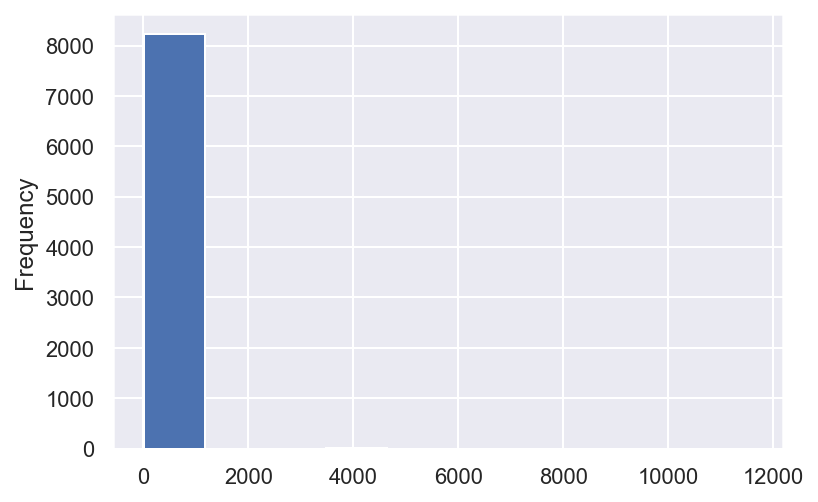

In [227]:
%matplotlib inline
data['PremMotor'].plot.hist()
plt.show()

Text(0.5, 0.98, "Numeric Variables' Histograms")

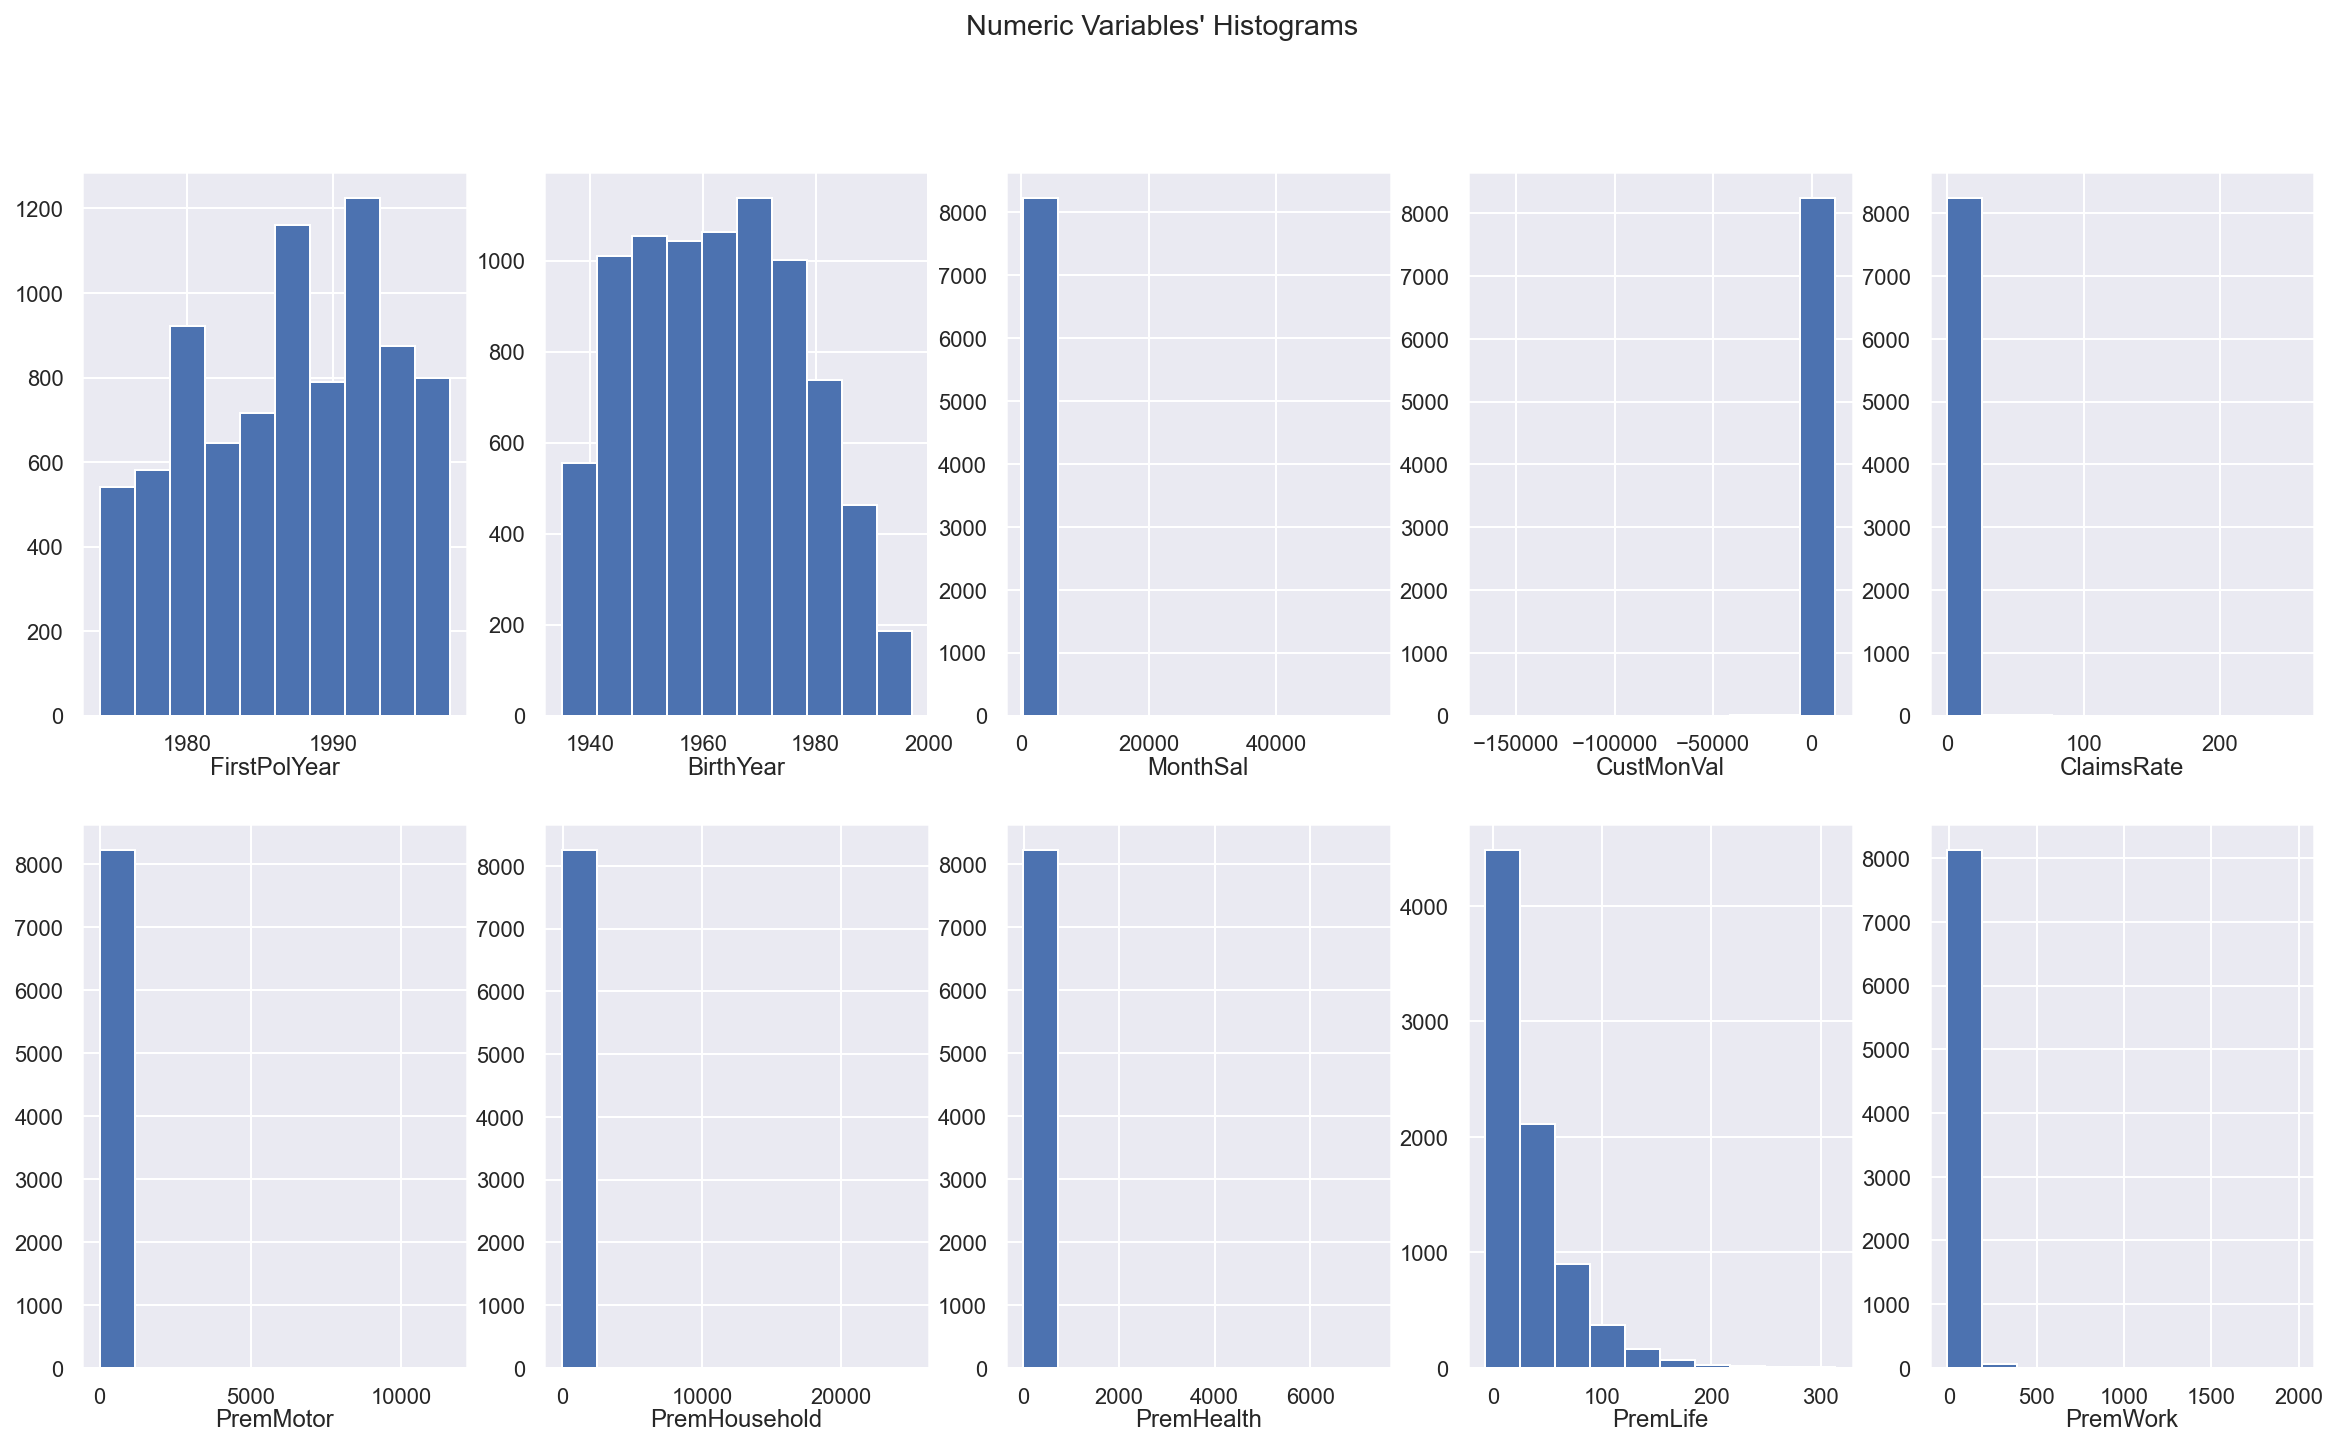

In [228]:
%matplotlib inline

sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(data[feat][~np.isnan(data[feat])], bins=10)  
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

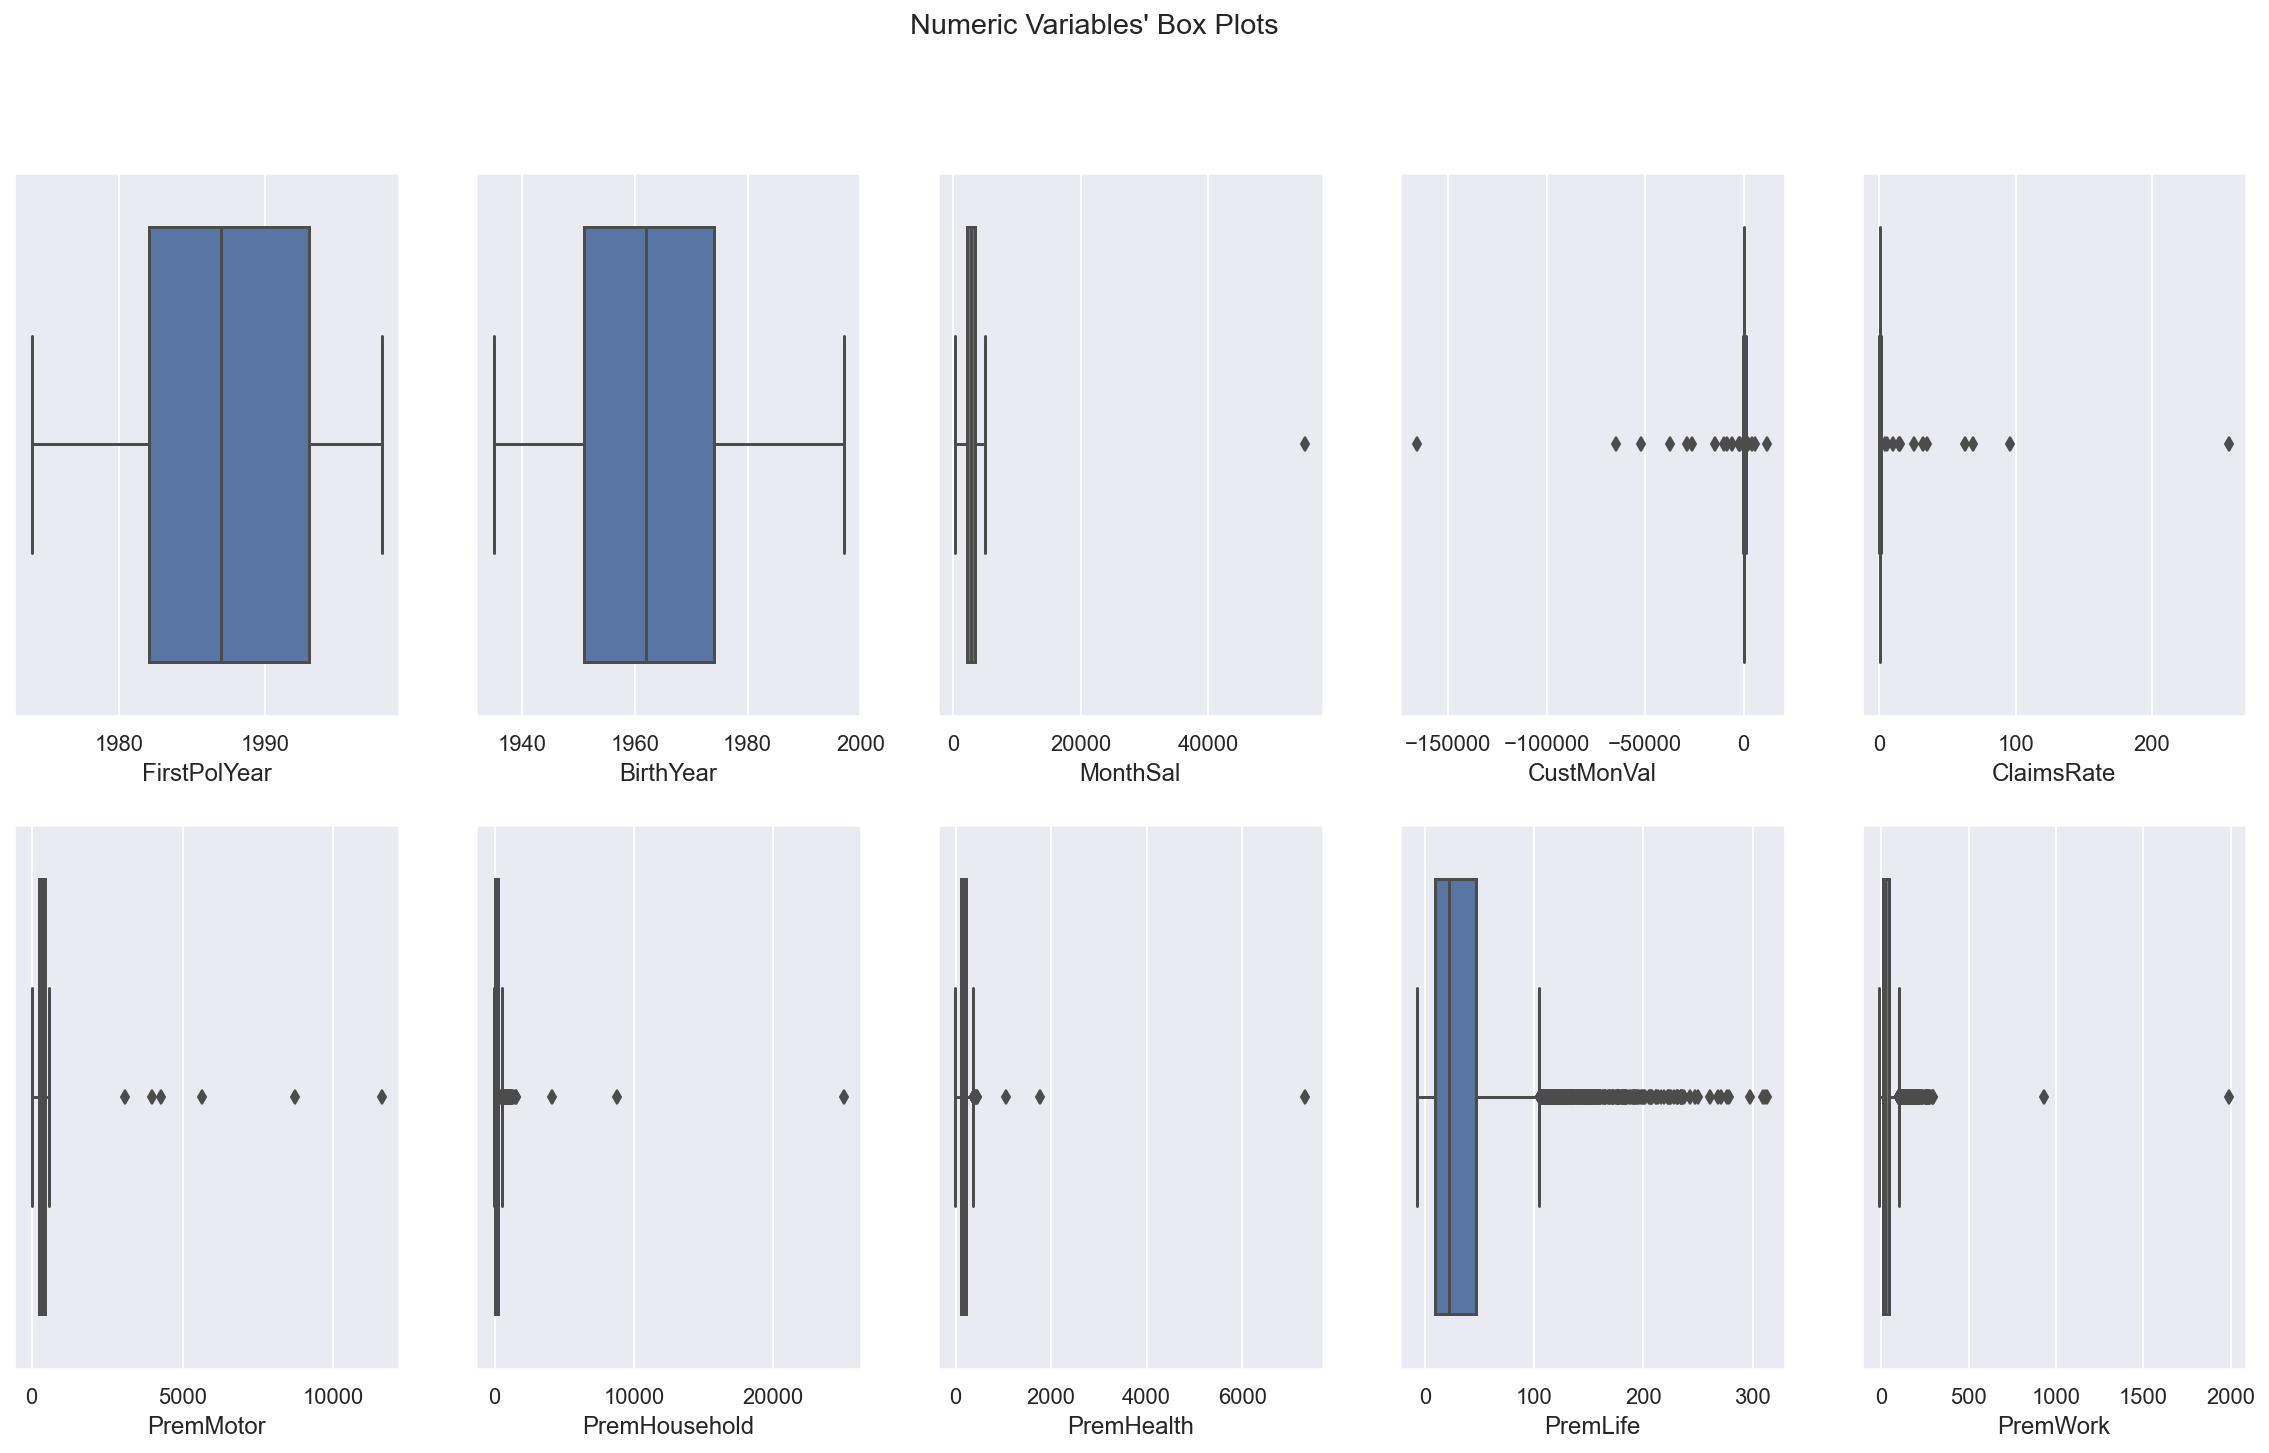

In [229]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

<a class="anchor" id="7th-bullet">

### 2.1.1. Manual Filter
    
</a>

In [237]:

filters1 = (
    (data['MonthSal']<=10000)
    &
    (data['CustMonVal']>=-50000)
    &
    (data['ClaimsRate']<=100)
    &
    (data['PremMotor']<=5000)
    &
    (data['PremHousehold']<=10000)
    &
    (data['PremHealth']<=2000)
    &
    (data['PremLife']<=200)
    &
    (data['PremWork']<=500)
    
)

data_1 = data[filters1]

In [253]:
print(type(filters1))

<class 'pandas.core.series.Series'>


In [238]:
print('Percentage of outliers removed:', 1-np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of outliers removed: 0.03080000000000005


<a class="anchor" id="8th-bullet">

### 2.2.2  IQR Method
    
</a>

In [239]:
# NOT THE BEST METHOD WHEN HAVING MANY FEATURES

q25 = data.quantile(.25)
q75 = data.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

NameError: name 'df' is not defined

In [309]:
def drop_outliers_IQR(df, iqr_mult,  metric_features):
    lista_index = list(data.index)
    filters2 = []
    for metric in metric_features:
    
        q25 = df[metric].quantile(.25)
        q75 = df[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + (iqr_mult * iqr)
        lower_lim = q25 - (iqr_mult * iqr)
        print(upper_lim)
        print(lower_lim)
        filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))
        filters2 = pd.Series(np.all(filters2, 0))
        # reindex is not essential
        filters2.reindex(lista_index)
        print(filters2)
        print(filters2.index)
        
    
       
    print(filters2.index)
    print(type(filters2))
    df_1 = df[df[filters2] == True]

    return df_1

In [310]:
drop_outliers_IQR(data, 3,  ['MonthSal','PremMotor'])

7406.0
-1820.0
0       True
1       True
2       True
3       True
4       True
        ... 
8247    True
8248    True
8249    True
8250    True
8251    True
Length: 8252, dtype: bool
RangeIndex(start=0, stop=8252, step=1)
1019.7249755859375
-364.0174560546875
0    False
dtype: bool
RangeIndex(start=0, stop=1, step=1)
RangeIndex(start=0, stop=1, step=1)
<class 'pandas.core.series.Series'>


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_24320/3297563587.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(lower_lim, upper_lim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_24320/3297563587.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df[filters2] == True]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [244]:
data

,FirstPolYear,BirthYear,EducDeg,MonthSal,EducDeg_cat,EducDeg_ord,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,,,
1.0,1985,1982,2 - High School,2177.0,High School,2,1,1,380.970001,0.39,375.850006,79.449997,146.360001,47.009998,16.889999
3.0,1991,1970,1 - Basic,2277.0,Basic,1,3,0,504.670013,0.28,206.149994,224.5,124.580002,86.349998,99.019997
4.0,1990,1981,3 - BSc/MSc,1099.0,BSc/MSc,3,4,1,-16.99,0.99,182.479996,43.349998,311.170013,35.34,28.34
5.0,1986,1973,3 - BSc/MSc,1763.0,BSc/MSc,3,4,1,35.23,0.9,338.619995,47.799999,182.589996,18.780001,41.450001
6.0,1986,1956,2 - High School,2566.0,High School,2,4,1,-24.33,1.0,440.75,18.9,114.800003,7.0,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,1984,1949,4 - PhD,3188.0,PhD,4,2,0,-0.11,0.96,393.73999,49.450001,173.809998,9.78,14.78
10293.0,1977,1952,1 - Basic,2431.0,Basic,1,3,0,1405.599976,0.0,133.580002,1035.75,143.25,12.89,105.129997
10294.0,1994,1976,3 - BSc/MSc,2918.0,BSc/MSc,3,1,1,524.099976,0.21,403.630005,132.800003,142.25,12.67,4.89


## FOR NORMAL DISTRIBUTIONS 3 DESVIOS PADRAO

<a class="anchor" id="9th-bullet">

### 2.1. Missing Values
    
</a>

In [275]:
# Checking maximum number of nan in a record

data.isna().sum()
print(data.loc[1,:].isna().sum())
maxi=0
ind_max=0
for i in data.index:
    if data.loc[i,:].isna().sum()>maxi:
        maxi=data.loc[i,:].isna().sum()
        ind_max=i
print(maxi,ind_max)

#decided not to drop the record since there are many more features.

0
4 863.0


In [312]:
# 
check_nan_feature=pd.DataFrame(data.isna().sum())#.rename(columns={0:'Nr_missings'})
#check_nan_feature.columns.values[0]="Nr_missings"
#
check_nan_feature['perc']=check_nan_feature[0']/len(data) *100

KeyError: '0'

In [280]:
check_nan_feature
# there is no feature with more than 20% of nan values

,0
FirstPolYear,0
BirthYear,0
EducDeg,0
MonthSal,22
EducDeg_cat,0
EducDeg_ord,0
GeoLivArea,0
Children,10
CustMonVal,0
ClaimsRate,0


In [ ]:
##KNN

In [ ]:
##MEAN; MEDIAN; MODE